In [1]:
import pandas as pd
import numpy as np

In [2]:
url = r'C:\Users\Administrador\Music\Project-SPTrans-Data-Analysis\01. dados\sptrans\routes.txt'
df = pd.read_csv(url)
df

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1012-10,1,1012-10,Term. Jd. Britania - Jd. Monte Belo,3,509E2F,FFFFFF
1,1012-21,1,1012-21,Term. Jd. Britânia - Jd. Rosinha,3,509E2F,FFFFFF
2,1014-10,1,1014-10,Morro Doce - Cptm Perus,3,509E2F,FFFFFF
3,1015-10,1,1015-10,Term. Jd. Britânia - Chác. Maria Trindade,3,509E2F,FFFFFF
4,1016-10,1,1016-10,Cem. Do Horto - Shop. Center Norte,3,002F6C,FFFFFF
...,...,...,...,...,...,...,...
1334,N839-11,1,N839-11,Metrô Butantã - Metrô Vl. Mariana,3,FF671F,000000
1335,N840-11,1,N840-11,Term. Vl. Mariana - Sta. Cecília,3,FF671F,000000
1336,N841-11,1,N841-11,Term. Vl. Mariana - Sta. Cecília,3,FF671F,000000
1337,N842-11,1,N842-11,Term. Pinheiros - Cohab Raposo Tavares,3,FF671F,000000


In [3]:
df['local_onibus'] = df['route_id'].str.slice(0,1) 
df['regiao'] = np.where(df['local_onibus'] == '1', 'CENTRO'
                        ,np.where(df['local_onibus'] == '2', 'NORTE'
                            ,np.where(df['local_onibus'] == '3','LESTE'
                                ,'SUL'
                            )))
df.drop('route_short_name', inplace=True, axis=1)
df.drop('local_onibus', axis=1, inplace=True)
df

,route_id,agency_id,route_long_name,route_type,route_color,route_text_color,regiao
0,1012-10,1,Term. Jd. Britania - Jd. Monte Belo,3,509E2F,FFFFFF,CENTRO
1,1012-21,1,Term. Jd. Britânia - Jd. Rosinha,3,509E2F,FFFFFF,CENTRO
2,1014-10,1,Morro Doce - Cptm Perus,3,509E2F,FFFFFF,CENTRO
3,1015-10,1,Term. Jd. Britânia - Chác. Maria Trindade,3,509E2F,FFFFFF,CENTRO
4,1016-10,1,Cem. Do Horto - Shop. Center Norte,3,002F6C,FFFFFF,CENTRO
...,...,...,...,...,...,...,...
1334,N839-11,1,Metrô Butantã - Metrô Vl. Mariana,3,FF671F,000000,SUL
1335,N840-11,1,Term. Vl. Mariana - Sta. Cecília,3,FF671F,000000,SUL
1336,N841-11,1,Term. Vl. Mariana - Sta. Cecília,3,FF671F,000000,SUL
1337,N842-11,1,Term. Pinheiros - Cohab Raposo Tavares,3,FF671F,000000,SUL


In [4]:
display(df['regiao'].value_counts())

soma = df.groupby('route_type').agg(
    qtd=('regiao', 'count')
)
display(soma)

regiao
SUL       949
NORTE     156
LESTE     126
CENTRO    108
Name: count, dtype: int64

,qtd
route_type,
1,6
2,7
3,1326


In [5]:
url = r'C:\Users\Administrador\Music\Project-SPTrans-Data-Analysis\01. dados\sptrans\stops.txt'
df_paradas = pd.read_csv(url)
df_paradas 

,stop_id,stop_name,stop_desc,stop_lat,stop_lon
0,18848,Clínicas,NaN,-23.554022,-46.671108
1,18849,Vila Madalena,NaN,-23.546498,-46.691141
2,18850,Consolação,NaN,-23.558094,-46.660205
3,18851,Conceição,NaN,-23.635039,-46.641239
4,18852,Jabaquara,NaN,-23.646033,-46.641028
...,...,...,...,...,...
21794,960011507,"R. Caminho Do Engenho, 255",Ref.: R Bartolo Di Fredi/ R Padre Antonio Link,-23.595972,-46.741941
21795,960011508,"R. Caminho Do Engenho, 417",Ref.: R Bartolomeu Bandinelli/ R Bom Jesus Dos...,-23.596402,-46.743436
21796,960011509,"Av. Dr. Guilherme Dumont Villares, 50",Ref.: R Alfredo Mendes Da Silva/ Av Professor ...,-23.604681,-46.747021
21797,960011510,"R. Alfredo Mendes Da Silva, 499",Ref.: R Cedro/ Av Doutor Guilherme Dumont Vill...,-23.604420,-46.748357



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


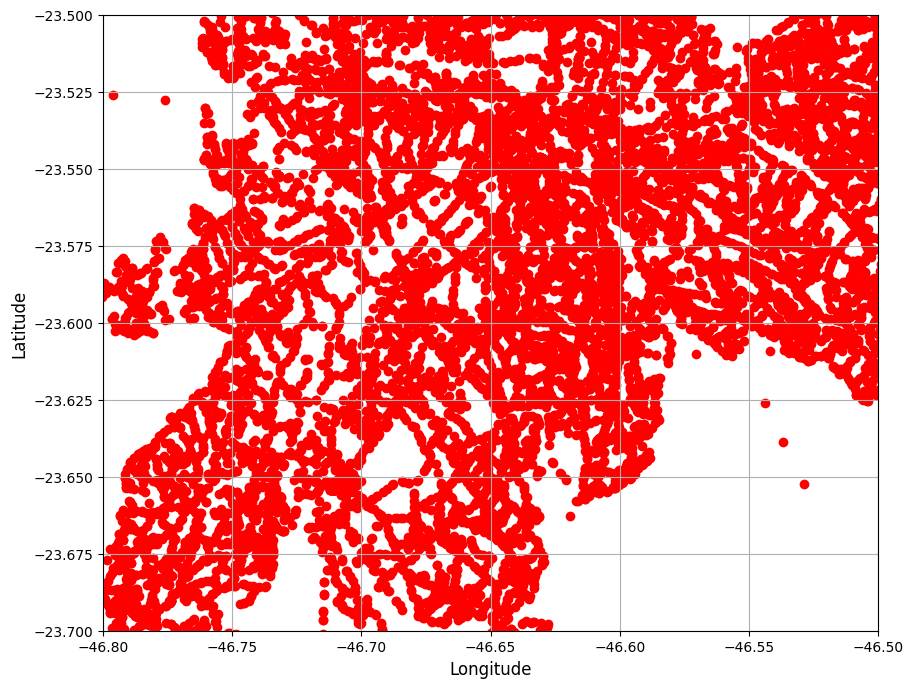

In [7]:
import pandas as pd
%pip install matplotlib

import matplotlib.pyplot as plt
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 8))

# Plotando as coordenadas (stop_lat, stop_lon)
plt.scatter(df_paradas['stop_lon'], df_paradas['stop_lat'], color='red', marker='o')

# Adicionando título e rótulos
plt.title('', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Ajustando os limites para focar em São Paulo
plt.xlim(-46.8, -46.5)  # Longitudes para a área de São Paulo
plt.ylim(-23.7, -23.5)  # Latitudes para a área de São Paulo

# Exibindo o gráfico
plt.grid(True)
plt.show()